In [1]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import pandas as pd 
import re 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import train_test_split

In [2]:
file=(r'C:\Users\SNEHAL DUBEY\Desktop\ONGC\UserCases_L4.xlsx')
data= pd.read_excel(file)
df= pd.DataFrame(data, columns=['Title'])
title_list=df["Title"].tolist()
print(title_list)
y=data['Category']
data.Title.fillna(data.Title.dropna().max(),inplace=True)
data.Category.fillna(data.Category.dropna().max(),inplace=True)

['documnets deleted', 'dump cartridge', 'no license available for petrel', 'Creation of Linux user for John Smith, SG (Wells), CPF: 12345', 'Restoration of Landmark projects', 'Plotter Paper Roll may be installed', 'system is producing strange noise', 'Install printer for windows workstation', 'Plotter of 3rd floor a wing', 'VALERIA Machines are extremely slow', 'load the Data from cartridges', 'In Zehplot queue, the job state is not changing from "exec" to "comp" on plot completion.', 'Downloading data file B157_127-DATA-INTEG.zip from geopic ftp .', 'Dump PSTM gather & RMS velocity', 'Downloading of ftp data "DATA_GEOPIC_SSWMH.zip"', 'Add survey to IP project', 'Data Access from openworks', 'DSG is responding slow', 'Creating new user ID', 'Unable to connect to Petrel license server', 'need to restore a embedded openworks project for training', 'hrs crashing on running CDP stack', 'DATA TRANSFER', 'Dump 6 Cartridges', 'need to uninstall techlog 2015.3 & Kingdom 2018', 'PL LOAD M-124T

In [3]:
lem = WordNetLemmatizer()
b=1
totlist=[]
for x in title_list:
    print('\n')
    print(b,".",x)
    b=b+1
    stop_words = stopwords.words('english')
    stop_words.remove('not')
    lw=x.lower()
#removing special character    
    sub = re.sub(r'\W', ' ', str(lw))
    print("no_special_charac_string : ",sub)
#tokenization
    tokenized_word=word_tokenize(sub) 
    filtered_word=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_word.append(w)
    print("Tokenized_Sentence:",tokenized_word)
    print("Filterd_Sentence:",filtered_word) 
#lemmatization  
    lemmed_word=[]
    for w in filtered_word:
        lemmed_word.append(lem.lemmatize(w,"v"))
    print("Lematized_Sentence:",lemmed_word)
    s=' '.join(lemmed_word)
    totlist.append(s)
print("\n")    
print(totlist)



1 . documnets deleted
no_special_charac_string :  documnets deleted
Tokenized_Sentence: ['documnets', 'deleted']
Filterd_Sentence: ['documnets', 'deleted']
Lematized_Sentence: ['documnets', 'delete']


2 . dump cartridge
no_special_charac_string :  dump cartridge
Tokenized_Sentence: ['dump', 'cartridge']
Filterd_Sentence: ['dump', 'cartridge']
Lematized_Sentence: ['dump', 'cartridge']


3 . no license available for petrel
no_special_charac_string :  no license available for petrel
Tokenized_Sentence: ['no', 'license', 'available', 'for', 'petrel']
Filterd_Sentence: ['license', 'available', 'petrel']
Lematized_Sentence: ['license', 'available', 'petrel']


4 . Creation of Linux user for John Smith, SG (Wells), CPF: 12345
no_special_charac_string :  creation of linux user for john smith  sg  wells   cpf  12345
Tokenized_Sentence: ['creation', 'of', 'linux', 'user', 'for', 'john', 'smith', 'sg', 'wells', 'cpf', '12345']
Filterd_Sentence: ['creation', 'linux', 'user', 'john', 'smith', 's

In [4]:
vector = CountVectorizer()
A=vector.fit_transform(totlist)
print(A.shape)

(500, 608)


In [5]:
tfidf=TfidfTransformer()
freq=tfidf.fit_transform(A)
print(freq.shape)

(500, 608)


In [6]:
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')



X_train, X_test, y_train, y_test = train_test_split(data['Title'],data['Category'],test_size=0.4,random_state=1)
print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))
print("\n\n")

training_data1 = vector.fit_transform(X_train)
training_data = tfidf.fit_transform(training_data1)
testing_data = vector.transform(X_test)


clf=MultinomialNB()
clf.fit(training_data, y_train)
predictions = clf.predict(testing_data)


cr=classification_report(y_test,predictions)
print('Precision and recall data :')
print(cr)
print("\n\n")

output=accuracy_score(y_test, predictions)
output1=output*100
print('Accuracy score: ', output1,'%' )


Number of rows in the total set: 500
Number of rows in the training set: 300
Number of rows in the test set: 200



Precision and recall data :
                       precision    recall  f1-score   support

       Backup Restore       1.00      0.12      0.22         8
        Data Transfer       0.84      0.73      0.78        22
                Issue       0.67      0.93      0.78        84
                Other       0.00      0.00      0.00        19
       Project Backup       1.00      0.12      0.22         8
     Project Creation       0.71      0.56      0.63        18
Software Installation       0.56      0.74      0.64        19
              Tape RW       0.65      0.88      0.75        17
            User CUDA       0.00      0.00      0.00         5

          avg / total       0.63      0.68      0.61       200




Accuracy score:  67.5 %


In [7]:
dfnew=pd.DataFrame()
dfnew['Title']=X_test
dfnew['Category']=y_test
dfnew['Predictions_NaiveBayes']=predictions

dfnew

,Title,Category,Predictions_NaiveBayes
304,modify IP project,Project Creation,Project Creation
340,print from plotter 1F/1FA is not coming out,Issue,Issue
47,Petrel License getting reset frequently,Issue,Issue
67,need to change the CRS in newly created project,Project Creation,Issue
479,zps command not working,Issue,Issue
485,Backup of Ratna Inversion project,Project Backup,Project Backup
310,related to opendtect,Issue,Issue
31,dump cartridge,Tape RW,Tape RW
249,Workstation got hanged,Issue,Issue
90,can not print,Issue,Issue


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 200, random_state = 42)
rf.fit(training_data, y_train)
predictions1 = rf.predict(testing_data)

cr=classification_report(y_test,predictions1)
print('Precision and recall data :')
print(cr)
print("\n\n")

op=accuracy_score(y_test, predictions1)
op1=op*100
print('Accuracy score: ', op1,'%')


Precision and recall data :
                       precision    recall  f1-score   support

       Backup Restore       0.75      0.38      0.50         8
        Data Transfer       0.74      0.77      0.76        22
                Issue       0.69      0.86      0.76        84
                Other       1.00      0.16      0.27        19
       Project Backup       0.67      0.50      0.57         8
     Project Creation       0.71      0.67      0.69        18
Software Installation       0.58      0.74      0.65        19
              Tape RW       0.93      0.82      0.87        17
            User CUDA       0.33      0.20      0.25         5

          avg / total       0.73      0.70      0.68       200




Accuracy score:  70.0 %


In [9]:
dfnew1=pd.DataFrame()
dfnew1['Title']=X_test
dfnew1['Category']=y_test
dfnew1['Predictions_RandomForest']=predictions1

dfnew1

,Title,Category,Predictions_RandomForest
304,modify IP project,Project Creation,Project Creation
340,print from plotter 1F/1FA is not coming out,Issue,Issue
47,Petrel License getting reset frequently,Issue,Issue
67,need to change the CRS in newly created project,Project Creation,Project Creation
479,zps command not working,Issue,Issue
485,Backup of Ratna Inversion project,Project Backup,Project Backup
310,related to opendtect,Issue,Issue
31,dump cartridge,Tape RW,Tape RW
249,Workstation got hanged,Issue,Issue
90,can not print,Issue,Issue


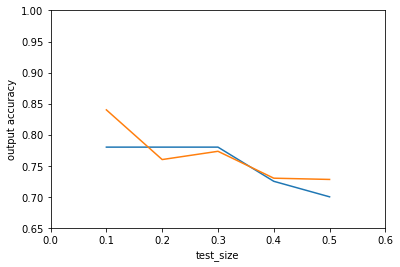

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('test_size')
plt.ylabel('output accuracy')

plt.plot([0.1,0.2,0.3,0.4,0.5], [0.78,0.78,0.78,0.725,0.70])
plt.plot([0.1,0.2,0.3,0.4,0.5], [0.84,0.76,0.7733,0.73,0.728])
plt.axis([0, 0.6, 0.65, 1])

plt.show()

In [11]:
import pickle
with open('text_classifier_pkl', 'wb'):
    s = pickle.dumps(clf)

with open('text_classifier_pkl', 'rb'):
    clf2 = pickle.loads(s)
print(clf2)
    
y_pred2=clf2.predict(testing_data)
p1=accuracy_score(y_test, y_pred2)
print(p1*100,'%')

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
67.5 %


In [12]:
import pickle

with open('text_classifier1_pkl', 'wb'):
    s = pickle.dumps(rf)

with open('text_classifier1_pkl', 'rb'):
    rf2 = pickle.loads(s)
print(rf2)

y_pred2=rf2.predict(testing_data)
p2=accuracy_score(y_test, y_pred2)
print(p2*100,'%')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
70.0 %


In [13]:
import os
from sklearn.externals import joblib
joblib_file="joblib_classifier_model.pkl"

joblib.dump(rf,joblib_file)
model=joblib.load(joblib_file)

X_xl=df['Title']
df['Pred_category']=0
X_xl_vect=vector.transform(X_xl)
X_xl_tfidf=tfidf.transform(X_xl_vect)
df['Pred_category']=model.predict(X_xl_tfidf)

engine='xlsxwriter'

df.to_excel("output.xlsx")
c=os.getcwd()
c=c+'\\output.xlsx'
os.startfile(c)